In [1]:
# !pip install unidecode

In [2]:
import unidecode
import pandas as pd
from pycaret.nlp import *
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from autocorrect import Speller
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from tqdm import tqdm
tqdm.pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)

In [4]:
data = pd.read_csv("web_trust_content.csv")

In [5]:
data.head()

,document_id,URL,Credibility_rating,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,category,JJ,NN,DT,VB,RB,num_ne,sum_ne,document_url_y,X1,X2,X3,X4,X5,X9,Total,Leik,Eijk,Tastle,Leik 3 4 6,correction,resp_HNC,Controversial,troia_label,content
0,2199424,http://unemployment.ohio.gov/,3.714286,0.0,0.0,106.0,6.0,9.0,5.0,22.0,23.0,0.0,10.0,12.0,62.0,84.0,68.0,6137.0,101.0,114.0,1.0,0.0,98.0,6.543833,15.903189,computer_internet,121.0,938.0,184.0,338.0,52.0,7.0,29.0,gov,0.0,1.0,2.0,2.0,2.0,0.0,7.0,0.571429,0.357143,0.613196,0.542857,0.0,2,U,3.0,NaN
1,2199427,http://www.law.cornell.edu/wex/unemployment_co...,4.428571,4.0,75000.0,1824.0,5.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9098.0,2661.0,15.0,23.0,0.0,0.0,2.0,3.813895,15.903189,business,35.0,168.0,59.0,71.0,5.0,4.0,17.0,edu,0.0,0.0,1.0,2.0,4.0,0.0,7.0,0.714286,0.714286,0.735143,0.600000,0.0,3,U,5.0,['Unemployment compensation | Wex | US Law | L...
2,2547110,http://kiem-tv.com/?q=node/4395,4.000000,0.0,0.0,18.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,2.0,185.0,809409.0,19.0,18.0,0.0,1.0,26.0,3.163160,11.208143,health,18.0,100.0,23.0,52.0,11.0,5.0,20.0,com,0.0,0.0,2.0,3.0,2.0,0.0,7.0,0.714286,0.571429,0.762836,0.657143,0.0,2,U,4.0,"[""Redwood News - KIEM-TV - Local Humboldt Coun..."
3,2547112,http://www.sciencedaily.com/releases/2012/09/1...,4.833333,9.0,75000.0,383.0,3.0,45.0,9.0,100.0,2.0,0.0,17.0,35.0,113.0,165.0,50939.0,2549.0,19.0,20.0,0.0,0.0,15.0,3.727098,14.554593,health,39.0,156.0,46.0,67.0,21.0,8.0,24.0,com,0.0,0.0,0.0,1.0,5.0,0.0,6.0,0.916667,0.916667,0.892660,0.866667,0.0,3,U,5.0,['']
4,2547113,http://articles.timesofindia.indiatimes.com/20...,3.888889,2.0,75000.0,599.0,3.0,3.0,3.0,7.0,0.0,0.0,1.0,3.0,3.0,7.0,1250.0,132.0,19.0,17.0,0.0,0.0,16.0,3.357533,14.554593,science_technology,32.0,112.0,39.0,57.0,8.0,6.0,10.0,com,0.0,0.0,3.0,4.0,2.0,0.0,9.0,0.722222,0.611111,0.756750,0.688889,0.0,2,U,4.0,NaN


In [6]:
data.columns

Index(['document_id', 'URL', 'Credibility_rating', 'ad_count', 'ad_max_size',
       'css_definitions', 'page_rank', 'bitly_clicks', 'bitly_referrers',
       'tweets', 'delicious_bookmarks', 'fb_clicks', 'fb_comments', 'fb_likes',
       'fb_shares', 'fb_total', 'alexa_linksin', 'alexa_rank', 'commas',
       'dots', 'exclamations', 'questions', 'spelling_errors',
       'text_complexity', 'smog', 'category', 'JJ', 'NN', 'DT', 'VB', 'RB',
       'num_ne', 'sum_ne', 'document_url_y', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X9', 'Total', 'Leik', 'Eijk', 'Tastle', 'Leik 3 4 6', 'correction',
       'resp_HNC', 'Controversial', 'troia_label', 'content'],
      dtype='object')

In [7]:
data_1 = data.drop(['document_id', 'URL', 'Credibility_rating', 'ad_count', 'ad_max_size',
       'css_definitions', 'page_rank', 'bitly_clicks', 'bitly_referrers',
       'tweets', 'delicious_bookmarks', 'fb_clicks', 'fb_comments', 'fb_likes',
       'fb_shares', 'fb_total', 'alexa_linksin', 'alexa_rank', 'commas',
       'dots', 'exclamations', 'questions', 'spelling_errors',
       'text_complexity', 'smog', 'JJ', 'NN', 'DT', 'VB', 'RB',
       'num_ne', 'sum_ne', 'document_url_y', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X9', 'Total', 'Leik', 'Eijk', 'Tastle', 'Leik 3 4 6', 'correction',
       'resp_HNC', 'Controversial', 'troia_label'], axis = 1)

In [8]:
data_1.head()

,category,content
0,computer_internet,NaN
1,business,['Unemployment compensation | Wex | US Law | L...
2,health,"[""Redwood News - KIEM-TV - Local Humboldt Coun..."
3,health,['']
4,science_technology,NaN


In [9]:
def remove_newlines_tabs(text):
    formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\\t',' ').replace('\\', ' ').replace('. com', '.com')
    # formatted_text = re.sub(r"[\n\\t]*", "", text)
    return formatted_text

def remove_punctuation(text):
    formatted_text = re.sub(r'[^\w\s]', '', text)
    return formatted_text

def remove_links(text):
    remove_https = re.sub(r'http\S+', '', text)
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

def remove_whitespaces(text):
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)

    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text

def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text

def to_lowercase(text):
    text = text.lower()
    return text

def reduce_char_rep(text):
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

In [10]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
}

def expand_contractions(text, contraction_mapping =  CONTRACTION_MAP):
    list_Of_tokens = text.split(' ')
    for Word in list_Of_tokens:  
         if Word in CONTRACTION_MAP: 
                list_Of_tokens = [item.replace(Word, CONTRACTION_MAP[Word]) for item in list_Of_tokens]
    String_Of_tokens = ' '.join(str(e) for e in list_Of_tokens) 
    return String_Of_tokens

In [11]:
def remove_special_characters(text):
    Formatted_Text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text) 
    return Formatted_Text

In [12]:
stoplist = stopwords.words('english') 
stoplist = set(stoplist)
stoplist = list(stoplist)

In [13]:
def removing_stopwords(text):
    text = repr(text)
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stoplist ]
    words_string = ' '.join(No_StopWords)    
    return words_string

In [14]:
def spell_correct(text):
    spell = Speller(lang='en')
    Corrected_text = spell(text)
    return Corrected_text

In [15]:
def preprocess_pipe(text, preprocessor_func_list):
    for func in preprocessor_func_list:
        text = func(text)
    return text

In [16]:
func_list = [
            remove_newlines_tabs,
             remove_punctuation,
             remove_links,
             remove_whitespaces,
             remove_accented_chars,
             to_lowercase, 
             reduce_char_rep,
             expand_contractions,
             removing_stopwords,
             # remove_special_characters,
             # spell_correct
            ]

In [17]:
data_1.content[1]

"['Unemployment compensation | Wex | US Law | LII / Legal Information Institute Please help us improve our site! × No thank you Skip to main content Cornell Law', '\\t\\t\\t\\tSchool Search', '\\t\\t\\t\\tCornell Toggle navigation Please help', '\\t\\t\\t\\t\\t\\t\\tus improve our site! Support Us! Search About', '\\t\\t\\t\\t\\t\\t\\t\\t\\tLII Who We Are What We Do Who Pays For This Contact Us Get the', '\\t\\t\\t\\t\\t\\t\\t\\t\\tlaw Constitution Supreme Court U.S. Code CFR Federal Rules Federal Rules of Appellate Procedure Federal Rules of Civil Procedure Federal Rules of Criminal Procedure Federal Rules of Evidence Federal Rules of Bankruptcy Procedure U.C.C. Law by jurisdiction State law Uniform laws Federal law World law Lawyer directory Legal encyclopedia Business law Constitutional law Criminal law Family law Employment law Money and Finances More... Help out Give Sponsor Advertise Create Promote Join Lawyer Directory LII Wex Unemployment compensation Unemployment compensation 

In [18]:
preprocess_pipe(data_1.content[1], func_list)

"'unemployment compensation wex us law lii legal information institute please help us improve site thank skip main content cornell law school search cornell toggle navigation please help us improve site support us search lii pays contact us get law constitution supreme court us code cfr federal rules federal rules appellate procedure federal rules civil procedure federal rules criminal procedure federal rules evidence federal rules bankruptcy procedure ucc law jurisdiction state law uniform laws federal law world law lawyer directory legal encyclopedia business law constitutional law criminal law family law employment law money finances help give sponsor advertise create promote join lawyer directory lii wex unemployment compensation unemployment compensation primary tabs unemployment compensation law overview unemployment insurance provides workers whose jobs terminated fault monetary payments given period time find new job unemployment payments intended provide unemployed worker time

# Data Cleaning

In [19]:
data_1.dropna(subset = 'content', inplace = True)

In [20]:
data_1['content'] = data_1['content'].progress_apply(lambda x: preprocess_pipe(x, func_list))

100%|█████████████████████████████████████████████████████████████████████████████| 4834/4834 [00:35<00:00, 135.21it/s]


In [21]:
data_1.content[5096]

"'smoking china steady growth rate population 12 billion estimated number smokers 350 million annual cigarette production chinas state monopoly cntc 17 trillion cntc maintains 183 factories 150 tobacco drying plants 30 research institutes employs 520000 workers whoproduce 500 brands cigarette consumption chinas consumption approaches levels west european countries may soon surpass levels countries death rates cancer smokingrelated causes also rising average cigarette consumption per person year selected countries 199092 netherlands 2820 us 2670 spain 2670 germany 2360 britain 2210 france 2120 portugal 2010 italy 1920 china 1900 average annual cigarette use per person china 7072 730 8082 1290 9092 1900 estimated deaths smokingrelated causes china millions 1996 05 2025 20 projected source world health organization originally washington post wednesday november 20 1996 page a01 '"

In [22]:
mask = (data_1.content.str.len() < 950)
print(data_1.loc[mask].shape)
data_1.loc[mask]

(1926, 2)


,category,content
3,health,''
5,health,'ofspiritcom ofspiritcom retired although webs...
13,health,'sorry something went wrong '
17,health,'access denied wwebmdcom used cloudflare restr...
18,health,'not acceptable acceptable appropriate represe...
19,health,'not acceptable acceptable appropriate represe...
27,business,'error 404 found 404 error page found '
29,culture_politics,'404 found found requested url lesson_84_notes...
34,law_crime,'come back soon pchcom appreciate interest pub...
38,arts_entertainment,'page found mommy shoestring main menu parenti...


In [23]:
mask_1 = data_1.content.str.contains("404")
data_1[mask_1].shape
data_1[mask_1]

,category,content
6,health,'coconut tree life superfood cureall spiritual...
21,health,'chicago tribune 404 sorry cant find youre loo...
27,business,'error 404 found 404 error page found '
29,culture_politics,'404 found found requested url lesson_84_notes...
35,business,'europe world business recorder anl 1124 decre...
70,NaN,'video silindi dailymotion video sign explore ...
76,sports,'bike racing events usa cycling foundation fou...
77,arts_entertainment,'page found full focus close xa0 x blog podcas...
90,health,'404 found 404 found please forward error scre...
104,health,'404 page found peopleforbikes explore network...


In [24]:
data_1.loc[mask] = np.nan
data_1.loc[mask_1] = np.nan

In [25]:
data_1.isna().sum()

category    2250
content     2174
dtype: int64

In [26]:
data_1.dropna(inplace = True)

In [27]:
data_1.shape

(2584, 2)

In [28]:
data_1

,category,content
1,business,'unemployment compensation wex us law lii lega...
2,health,'redwood news kiemtv local humboldt county new...
7,business,'27 ways use coconut oil beauty body cooking s...
8,gaming,'cooptimus review guardians middleearth coop r...
11,arts_entertainment,'singer whitney houston dies 48 fox news fox n...
12,arts_entertainment,'golden globes 2013 wins political films send ...
15,arts_entertainment,'go knoxville entertainment features knoxville...
16,arts_entertainment,'2013 oscar nominations announcement home mail...
20,health,'nimh page found skip main content transformin...
22,business,'forms north dakota tax skip main content main...


<AxesSubplot:>

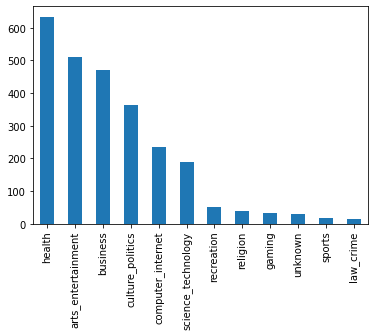

In [29]:
data_1.category.value_counts().plot(kind = "bar")

In [30]:
data_1.category.nunique()

12

In [31]:
data_1.head()

,category,content
1,business,'unemployment compensation wex us law lii lega...
2,health,'redwood news kiemtv local humboldt county new...
7,business,'27 ways use coconut oil beauty body cooking s...
8,gaming,'cooptimus review guardians middleearth coop r...
11,arts_entertainment,'singer whitney houston dies 48 fox news fox n...


# Natural Language Processing

In [32]:
# !pip install torchvision

In [33]:
# !pip install transformers

In [34]:
import torch
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification

## Encode labels

In [35]:
possible_labels = data_1.category.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'business': 0,
 'health': 1,
 'gaming': 2,
 'arts_entertainment': 3,
 'law_crime': 4,
 'culture_politics': 5,
 'computer_internet': 6,
 'religion': 7,
 'science_technology': 8,
 'sports': 9,
 'recreation': 10,
 'unknown': 11}

In [36]:
data_1['label'] = data_1.category.replace(label_dict)

## Train-val split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data_1.index.values,
                                                  data_1.label.values,
                                                  test_size = 0.15,
                                                  random_state = 42,
                                                  stratify = data_1.label.values)

In [38]:
data_1['data_type'] = ['not_set']*data_1.shape[0]

In [39]:
data_1.loc[X_train, 'data_type'] = 'train'
data_1.loc[X_val, 'data_type'] = 'val'

In [40]:
data_1.groupby(['category', 'label', 'data_type']).count()

content
category           label data_type         
arts_entertainment 3     train          432
                         val             77
business           0     train          400
                         val             71
computer_internet  6     train          200
                         val             35
culture_politics   5     train          308
                         val             54
gaming             2     train           28
                         val              5
health             1     train          539
                         val             95
law_crime          4     train           12
                         val              2
recreation         10    train           43
                         val              8
religion           7     train           33
                         val              6
science_technology 8     train          161
                         val             28
sports             9     train           15
                         val              3
unknown            11    train           25
                         val              4

In [41]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

encoded_data_train = tokenizer.batch_encode_plus(
    data_1[data_1.data_type == 'train'].content.values,
    add_special_tokens = True, 
    return_attention_mask = True,
    pad_to_max_length = True,
    max_length = 256,
    return_tensors = 'pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    data_1[data_1.data_type == 'val'].content.values,
    add_special_tokens = True,
    return_attention_mask = True,
    pad_to_max_length = True,
    max_length = 256,
    return_tensors = 'pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
G:\vEnvTools\Anaconda_20\envs\env_1\lib\site-packages\transformers\tokenization_utils_base.py:2271: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [42]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(data_1[data_1.data_type == 'train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(data_1[data_1.data_type == 'val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [43]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## Data Loaders

In [44]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler = SequentialSampler(dataset_val),
                                   batch_size = batch_size)

## Optimizer and Scheduler

In [45]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [46]:
optimizer = AdamW(model.parameters(),
                  lr = 1e-5,
                  eps = 1e-8)

epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = len(dataloader_train)*epochs)

G:\vEnvTools\Anaconda_20\envs\env_1\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Performance Metrics


In [62]:
from sklearn.metrics import f1_score, confusion_matrix

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = "weighted")

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat == label]
        y_true = labels_flat[labels_flat == label]
        print(f"Class : {label_dict_inverse[label]}")
        print(f"Accuracy: {len(y_preds[y_preds == label])}/{len(y_true)} = {len(y_preds[y_preds == label])/len(y_true)}\n")


## Training Loop

In [48]:
torch.cuda.is_available()

True

In [51]:
device = torch.device('cuda')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [54]:
# import os
# os.mkdir("data_volume")

In [55]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|                                                                                            | 0/5 [06:08<?, ?it/s]


Epoch 1
Training loss: 0.9986401891457986


 20%|████████████████▌                                                                  | 1/5 [06:24<25:36, 384.06s/it]

Validation loss: 1.2217815208463714
F1 Score (Weighted): 0.6420975497951654



 20%|████████████████▌                                                                  | 1/5 [12:41<25:36, 384.06s/it]


Epoch 2
Training loss: 0.9515668077068657


 40%|█████████████████████████████████▏                                                 | 2/5 [12:57<19:28, 389.48s/it]

Validation loss: 1.3731104195619432
F1 Score (Weighted): 0.6389873092021947



 40%|█████████████████████████████████▏                                                 | 2/5 [19:12<19:28, 389.48s/it]


Epoch 3
Training loss: 0.8577260422085213


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [19:27<12:59, 389.82s/it]

Validation loss: 1.4542016390496149
F1 Score (Weighted): 0.652286345327988



 60%|█████████████████████████████████████████████████▊                                 | 3/5 [25:41<12:59, 389.82s/it]


Epoch 4
Training loss: 0.7605837289081082


 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [25:56<06:29, 389.55s/it]

Validation loss: 1.4907353792984326
F1 Score (Weighted): 0.648681210462191



 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [32:09<06:29, 389.55s/it]


Epoch 5
Training loss: 0.7257450402681233


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [32:24<00:00, 388.98s/it]

Validation loss: 1.4907353792984326
F1 Score (Weighted): 0.648681210462191


In [56]:
model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_1.model', map_location=torch.device('cuda')))

<All keys matched successfully>

In [63]:
_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Class : business
Accuracy: 51/71 = 0.7183098591549296

Class : health
Accuracy: 80/95 = 0.8421052631578947

Class : gaming
Accuracy: 2/5 = 0.4

Class : arts_entertainment
Accuracy: 66/77 = 0.8571428571428571

Class : law_crime
Accuracy: 0/2 = 0.0

Class : culture_politics
Accuracy: 27/54 = 0.5

Class : computer_internet
Accuracy: 11/35 = 0.3142857142857143

Class : religion
Accuracy: 1/6 = 0.16666666666666666

Class : science_technology
Accuracy: 20/28 = 0.7142857142857143

Class : sports
Accuracy: 0/3 = 0.0

Class : recreation
Accuracy: 0/8 = 0.0

Class : unknown
Accuracy: 0/4 = 0.0



In [66]:
np.argmax(predictions, axis = 1).flatten()

array([1, 0, 0, 1, 0, 3, 3, 1, 0, 0, 1, 3, 3, 1, 1, 8, 3, 5, 8, 0, 3, 1,
       1, 5, 1, 1, 1, 8, 1, 1, 1, 1, 3, 0, 0, 3, 3, 1, 1, 1, 0, 1, 3, 0,
       3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 8, 0, 0,
       0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 3, 6, 0, 6,
       6, 3, 0, 6, 0, 3, 1, 1, 1, 8, 0, 1, 0, 3, 6, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 3, 1, 8, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 5, 3,
       0, 1, 1, 1, 3, 1, 1, 1, 1, 8, 1, 8, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       6, 5, 8, 8, 5, 0, 3, 8, 0, 0, 5, 1, 8, 0, 8, 5, 5, 1, 0, 0, 0, 5,
       6, 0, 3, 3, 3, 0, 1, 1, 0, 3, 3, 6, 0, 0, 3, 1, 1, 3, 0, 0, 0, 0,
       3, 3, 3, 3, 1, 3, 3, 5, 1, 3, 1, 3, 3, 3, 0, 3, 3, 1, 3, 3, 1, 0,
       0, 0, 1, 0, 1, 3, 1, 5, 8, 1, 1, 3, 3, 3, 3, 3, 1, 5, 1, 0, 2, 3,
       3, 0, 0, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 8, 0, 0, 6,
       8, 0, 6, 6, 6, 6, 8, 1, 3, 5, 8, 1, 8, 1, 0, 0, 5, 0, 5, 2, 5, 5,
       1, 5, 0, 3, 5, 6, 3, 5, 5, 5, 5, 5, 3, 5, 8,